In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import scipy
%matplotlib inline

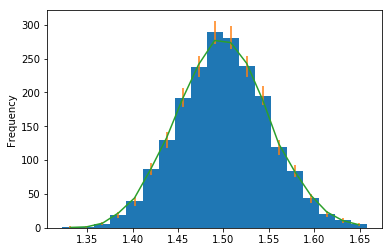

In [47]:
#Esercizio 1
N=2000
mean = 1.5
std = 0.05
n_bins = int(2.5*math.log(N))
x = np.random.normal(mean, std, N)
freq,bin_edges,_ = plt.hist(x,bins=n_bins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, freq, yerr=np.sqrt(freq), fmt='none')
ax = plt.gca()
ax.set_ylabel('Frequency')
kde_std = 1.06*x.std()*(x.size)**(-1/5)
#t = np.linspace(x.min(),x.max(),len(x))
g = np.zeros((N,len(bin_centers)))
for i in range(N):
    g[i,:] = stats.norm.pdf(bin_centers, loc=x[i], scale=kde_std)
    #plt.plot(g[i,:])
g = np.sum(g,axis=0)
g = g*np.sum(freq*(bin_edges[1:] - bin_edges[:-1]))/ scipy.integrate.trapz(y=g, x=bin_centers)
plt.plot(bin_centers,g)
plt.show()

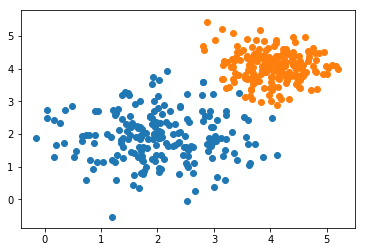

In [4]:
#Esercizio 2
m1,m2,s1,s2=2,4,0.8,0.5
def sample_cat_gaussian(length):
    x1 = np.random.randn(length,length)*s1+m1
    x2 = np.random.randn(length,length)*s2+m2
    return np.array([x1,x2])
data = sample_cat_gaussian(200)
plt.scatter(data[0,0], data[0,1])
plt.scatter(data[1,0], data[1,1])
plt.show()

In [89]:
#Esercizio 3
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2018-11-27 14:32:05--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2018-11-27 14:32:05--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c2f0f750fa236fc943f120c11.dl.dropboxusercontent.com/cd/0/inline/AWYr0tgV3LqMU-sALeMkvBYhbPyhTWCcJUpr184otPu_qOaQGUQXf47zV3Q5YfOnFx5BmibTBjZ04WfMD-fzE57Oew5_D8uSsxBodSdDJ3xS1Ee40qLkxx3pmorffmuP3TCPpBvvK9IDjEwmvkzr36bcOalU7nQ5rL7oevie8VPKeoCPV4MITaPvx3Zz_QcDYVg/file [following]
--2018-11-27 14:32:05--  https://uc8c2f0f750fa236fc943f120c11.dl.dropboxusercontent.com/cd/0/inline/AWYr0tgV3LqMU-sALeMkvBYhbPyhTWCcJ

In [5]:
data = np.load('residuals_261.npy').item()
df = pd.DataFrame(data)
df = df[np.abs(df['residuals'])<2]

In [36]:
a,b,rv,pv,stderr=stats.linregress(df)

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


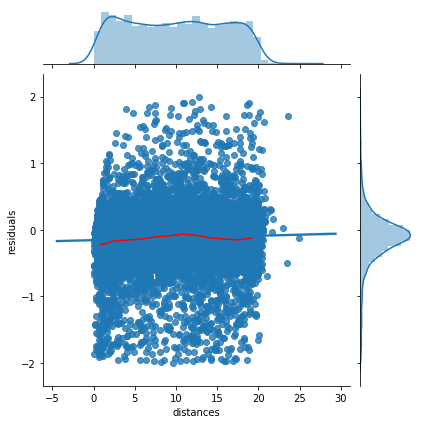

In [49]:
_,bin_edges = np.histogram(df['distances'], bins=12, range=(0,20))
x = 0.5*(bin_edges[1:] + bin_edges[:-1])
y = np.zeros(x.size)
prevx = 0
for i in range(x.size):
    temp = df[df['distances']<x[i]]
    y[i] = temp[temp['distances']>=prevx]['residuals'].values.mean()
    prevx = x[i]
sns.jointplot("distances","residuals",data=df, kind='reg')
plt.plot(x,y,color='r')
plt.show()